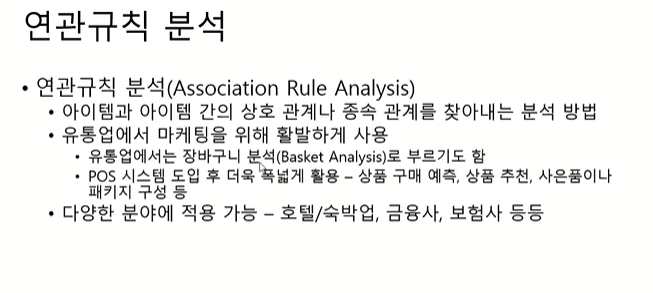

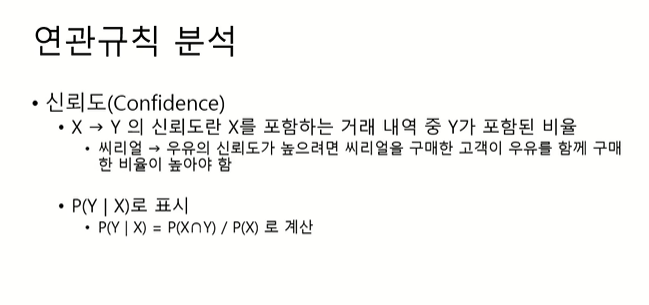

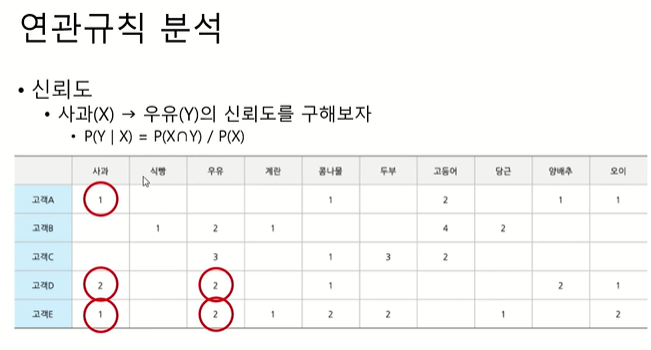

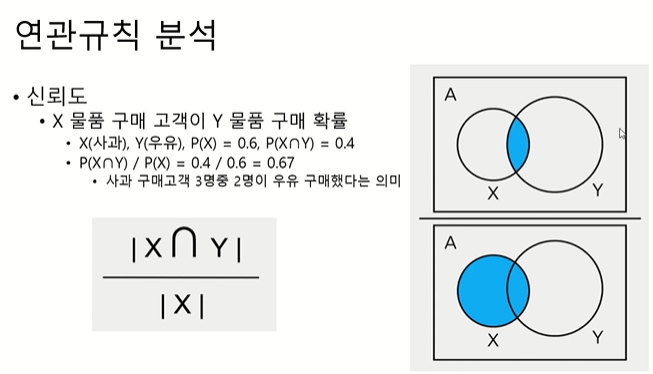

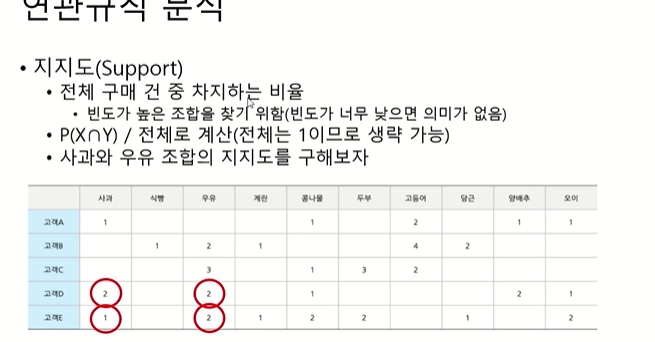

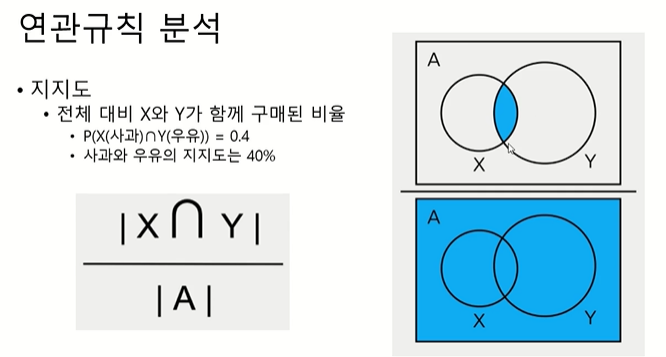

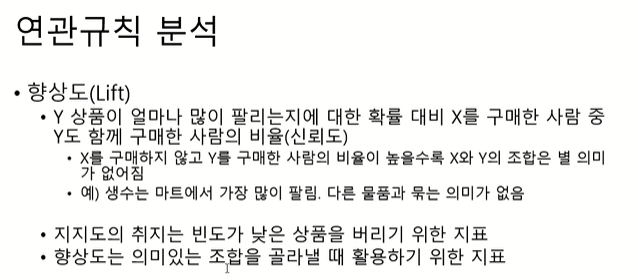

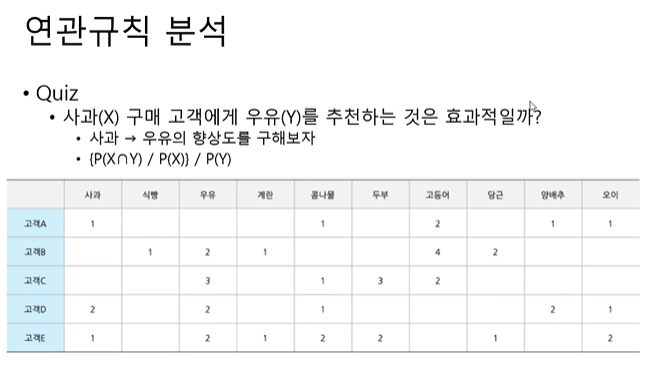

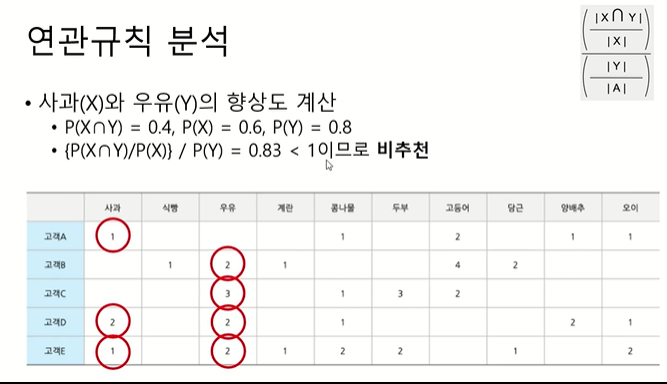

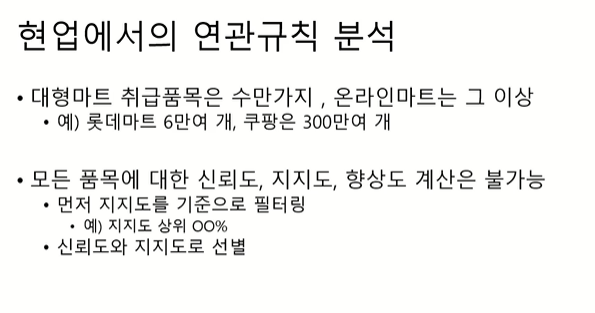

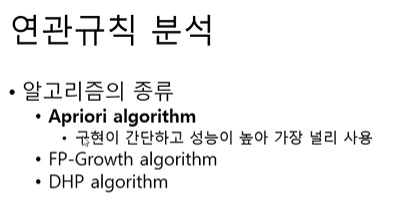

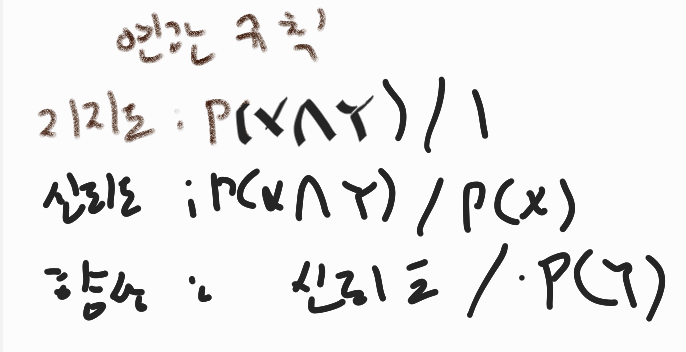

In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


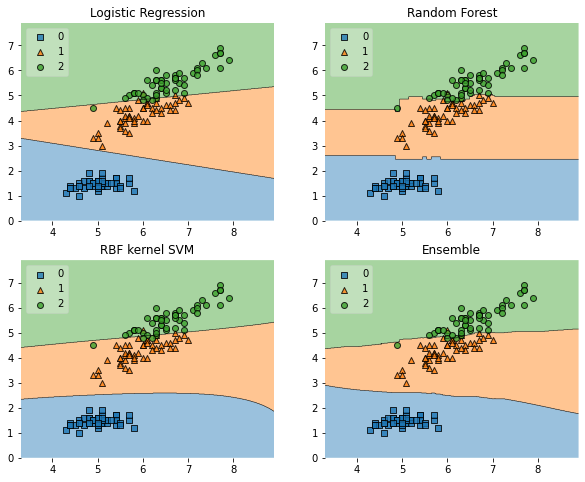

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
# 리스트의 리스트 형태로 트랜잭션 구성
dataset = [['빵','우유','씨리얼'],
          ['빵','기저귀','맥주','계란'],
          ['우유','기저귀','맥주','콜라'],
          ['빵','우유','기저귀','맥주'],
          ['빵','우유','기저귀','콜라','삼겹살'],
          ['우유','계란','씨리얼'],
          ['우유','기저귀','콜라','맥주'],
          ['삼겹살','콜라','맥주'],
          ['빵','우유','기저귀','맥주','계란'],
          ['우유','빵'],
          ['우유','씨리얼']]

In [8]:
# TransactionEncoder는 리스트의 리스트로 구성된 트랜잭션 데이터를 Numpy 배열로 인코딩하기 위함
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False, False,  True, False,  True,  True, False],
       [ True,  True,  True,  True, False, False, False, False],
       [False,  True,  True, False, False, False,  True,  True],
       [False,  True,  True,  True, False, False,  True, False],
       [False,  True, False,  True,  True, False,  True,  True],
       [ True, False, False, False, False,  True,  True, False],
       [False,  True,  True, False, False, False,  True,  True],
       [False, False,  True, False,  True, False, False,  True],
       [ True,  True,  True,  True, False, False,  True, False],
       [False, False, False,  True, False, False,  True, False],
       [False, False, False, False, False,  True,  True, False]])

In [9]:
# 칼럼확인
te.columns_

['계란', '기저귀', '맥주', '빵', '삼겹살', '씨리얼', '우유', '콜라']

In [10]:
# 데이터 프레임으로 변환
df = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
df

,계란,기저귀,맥주,빵,삼겹살,씨리얼,우유,콜라
0,False,False,False,True,False,True,True,False
1,True,True,True,True,False,False,False,False
2,False,True,True,False,False,False,True,True
3,False,True,True,True,False,False,True,False
4,False,True,False,True,True,False,True,True
5,True,False,False,False,False,True,True,False
6,False,True,True,False,False,False,True,True
7,False,False,True,False,True,False,False,True
8,True,True,True,True,False,False,True,False
9,False,False,False,True,False,False,True,False


In [16]:
#지지도 값으로 확인(아무 설정이 없으면 0.5이상만 나타내줌)
frequent_itemsets = apriori(df, min_support= 0.3,use_colnames=True)

In [17]:
frequent_itemsets

,support,itemsets
0,0.545455,(기저귀)
1,0.545455,(맥주)
2,0.545455,(빵)
3,0.818182,(우유)
4,0.363636,(콜라)
5,0.454545,"(기저귀, 맥주)"
6,0.363636,"(기저귀, 빵)"
7,0.454545,"(기저귀, 우유)"
8,0.363636,"(우유, 맥주)"
9,0.454545,"(우유, 빵)"


In [19]:
# w내림차순으로 지지도 정리
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
3,0.818182,(우유)
0,0.545455,(기저귀)
1,0.545455,(맥주)
2,0.545455,(빵)
5,0.454545,"(기저귀, 맥주)"
7,0.454545,"(기저귀, 우유)"
9,0.454545,"(우유, 빵)"
4,0.363636,(콜라)
6,0.363636,"(기저귀, 빵)"
8,0.363636,"(우유, 맥주)"


In [21]:
# 신뢰도 확인(설정이 없으면 0.8이상의 값만 도출)
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(기저귀),(맥주),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
1,(맥주),(기저귀),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
2,(기저귀),(빵),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(빵),(기저귀),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(기저귀),(우유),0.545455,0.818182,0.454545,0.833333,1.018519,0.008264,1.090909
5,(우유),(기저귀),0.818182,0.545455,0.454545,0.555556,1.018519,0.008264,1.022727
6,(우유),(맥주),0.818182,0.545455,0.363636,0.444444,0.814815,-0.082645,0.818182
7,(맥주),(우유),0.545455,0.818182,0.363636,0.666667,0.814815,-0.082645,0.545455
8,(우유),(빵),0.818182,0.545455,0.454545,0.555556,1.018519,0.008264,1.022727
9,(빵),(우유),0.545455,0.818182,0.454545,0.833333,1.018519,0.008264,1.090909


In [22]:
# 향상도 확인
association_rules(frequent_itemsets, metric='lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(기저귀),(맥주),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
1,(맥주),(기저귀),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
2,(기저귀),(빵),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(빵),(기저귀),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(기저귀),(우유),0.545455,0.818182,0.454545,0.833333,1.018519,0.008264,1.090909
5,(우유),(기저귀),0.818182,0.545455,0.454545,0.555556,1.018519,0.008264,1.022727
6,(우유),(빵),0.818182,0.545455,0.454545,0.555556,1.018519,0.008264,1.022727
7,(빵),(우유),0.545455,0.818182,0.454545,0.833333,1.018519,0.008264,1.090909
8,"(기저귀, 우유)",(맥주),0.454545,0.545455,0.363636,0.800000,1.466667,0.115702,2.272727
9,"(우유, 맥주)",(기저귀),0.363636,0.545455,0.363636,1.000000,1.833333,0.165289,inf


In [25]:
df_assoc = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
df_assoc.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,"(우유, 맥주)",(기저귀),0.363636,0.545455,0.363636,1.000000,1.833333,0.165289,inf
6,(기저귀),"(우유, 맥주)",0.545455,0.363636,0.363636,0.666667,1.833333,0.165289,1.909091
0,(기저귀),(맥주),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
1,(맥주),(기저귀),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
4,"(기저귀, 우유)",(맥주),0.454545,0.545455,0.363636,0.800000,1.466667,0.115702,2.272727
7,(맥주),"(기저귀, 우유)",0.545455,0.454545,0.363636,0.666667,1.466667,0.115702,1.636364
2,(기저귀),(빵),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(빵),(기저귀),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636


In [26]:
df_assoc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(기저귀),(맥주),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
1,(맥주),(기저귀),0.545455,0.545455,0.454545,0.833333,1.527778,0.157025,2.727273
2,(기저귀),(빵),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(빵),(기저귀),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,"(기저귀, 우유)",(맥주),0.454545,0.545455,0.363636,0.800000,1.466667,0.115702,2.272727
5,"(우유, 맥주)",(기저귀),0.363636,0.545455,0.363636,1.000000,1.833333,0.165289,inf
6,(기저귀),"(우유, 맥주)",0.545455,0.363636,0.363636,0.666667,1.833333,0.165289,1.909091
7,(맥주),"(기저귀, 우유)",0.545455,0.454545,0.363636,0.666667,1.466667,0.115702,1.636364


In [27]:
# 리스트의 리스트 형태로 트랜잭션 구성
dataset = [['배','사과','딸기'],
          ['배','사과','포도'],
          ['배','자몽'],
          ['사과','딸기'],
          ['배','사과','포도','딸기'],
          ['자몽','배'],
         ]

In [28]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[ True,  True,  True, False, False],
       [False,  True,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False, False],
       [ True,  True,  True, False,  True],
       [False,  True, False,  True, False]])

In [29]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,딸기,배,사과,자몽,포도
0,True,True,True,False,False
1,False,True,True,False,True
2,False,True,False,True,False
3,True,False,True,False,False
4,True,True,True,False,True
5,False,True,False,True,False


In [30]:
frequent_itemsets = apriori(df, min_support= 0.3,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.500000,(딸기)
1,0.833333,(배)
2,0.666667,(사과)
3,0.333333,(자몽)
4,0.333333,(포도)
5,0.333333,"(딸기, 배)"
6,0.500000,"(딸기, 사과)"
7,0.500000,"(배, 사과)"
8,0.333333,"(배, 자몽)"
9,0.333333,"(포도, 배)"


In [32]:
df_assoc = association_rules(frequent_itemsets, metric='lift', min_threshold=0)
df_assoc.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(포도),"(배, 사과)",0.333333,0.500000,0.333333,1.000000,2.000000,0.166667,inf
20,"(배, 사과)",(포도),0.500000,0.333333,0.333333,0.666667,2.000000,0.166667,2.000000
12,"(딸기, 배)",(사과),0.333333,0.666667,0.333333,1.000000,1.500000,0.111111,inf
10,(포도),(사과),0.333333,0.666667,0.333333,1.000000,1.500000,0.111111,inf
18,"(포도, 배)",(사과),0.333333,0.666667,0.333333,1.000000,1.500000,0.111111,inf
17,(사과),"(딸기, 배)",0.666667,0.333333,0.333333,0.500000,1.500000,0.111111,1.333333
11,(사과),(포도),0.666667,0.333333,0.333333,0.500000,1.500000,0.111111,1.333333
23,(사과),"(포도, 배)",0.666667,0.333333,0.333333,0.500000,1.500000,0.111111,1.333333
3,(사과),(딸기),0.666667,0.500000,0.500000,0.750000,1.500000,0.166667,2.000000
2,(딸기),(사과),0.500000,0.666667,0.500000,1.000000,1.500000,0.166667,inf


# 단톡방 과제 1
 - 60171100 윤민혁
 - 아래 데이터로 파이썬 코드를 이용하여 연관규칙분석을 수행하라

In [63]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [64]:
dataset = [['겨울왕국','미녀와 야수','쥬라기 월드','아바타','타이타닉'],
          ['스타워즈','어벤져스','아이언맨'],
          ['분노의 질주','어벤져스'],
          ['스타워즈','아바타','라이온 킹','어벤져스'],
          ['쥬라기 월드','아바타','해리포터'],
          ['스타워즈','겨울왕국','미녀와 야수','라이온 킹','해리포터'],
          ['스타워즈','어벤져스','분노의 질주','쥬라기 월드']]

In [65]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[ True, False,  True, False, False,  True, False, False,  True,
         True, False],
       [False, False, False, False,  True, False,  True,  True, False,
        False, False],
       [False, False, False,  True, False, False, False,  True, False,
        False, False],
       [False,  True, False, False,  True,  True, False,  True, False,
        False, False],
       [False, False, False, False, False,  True, False, False,  True,
        False,  True],
       [ True,  True,  True, False,  True, False, False, False, False,
        False,  True],
       [False, False, False,  True,  True, False, False,  True,  True,
        False, False]])

In [66]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,겨울왕국,라이온 킹,미녀와 야수,분노의 질주,스타워즈,아바타,아이언맨,어벤져스,쥬라기 월드,타이타닉,해리포터
0,True,False,True,False,False,True,False,False,True,True,False
1,False,False,False,False,True,False,True,True,False,False,False
2,False,False,False,True,False,False,False,True,False,False,False
3,False,True,False,False,True,True,False,True,False,False,False
4,False,False,False,False,False,True,False,False,True,False,True
5,True,True,True,False,True,False,False,False,False,False,True
6,False,False,False,True,True,False,False,True,True,False,False


In [67]:
# 지지도 확인
frequent_itemsets = apriori(df, min_support= 0.3,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.571429,(스타워즈)
1,0.428571,(아바타)
2,0.571429,(어벤져스)
3,0.428571,(쥬라기 월드)
4,0.428571,"(스타워즈, 어벤져스)"


In [72]:
# 신뢰도 확인
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(스타워즈),(어벤져스),0.571429,0.571429,0.428571,0.75,1.3125,0.102041,1.714286
1,(어벤져스),(스타워즈),0.571429,0.571429,0.428571,0.75,1.3125,0.102041,1.714286


In [69]:
# 향상도 확인
association_rules(frequent_itemsets, metric='lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(스타워즈),(어벤져스),0.571429,0.571429,0.428571,0.75,1.3125,0.102041,1.714286
1,(어벤져스),(스타워즈),0.571429,0.571429,0.428571,0.75,1.3125,0.102041,1.714286


- 지지도 0.3이상, 신뢰도 0.5 이상, 향상도가 1 이상인 컨텐츠를 확인해보았을 때 스타워즈와 어벤져스가 나왔다
- 스타워즈와 어벤져스를 묶음 컨텐츠로 하는 것이 좋다.